# Laboratorio 1 Series de Tiempo

Sofia Garcia - 22210

Julio Garcia Salas - 22076

Joaquin Campos - 22155

In [ ]:
import pandas as pd

file_path = "Estadisticas_historicas_comercializacion.xlsx"

importacion_df = pd.read_excel(file_path, sheet_name="IMPORTACION", header=6, nrows=289)
consumo_df = pd.read_excel(file_path, sheet_name="CONSUMO", header=6, nrows=301)

#consumo_df.head()
importacion_df.head()


DF que deseamos trabajar

In [ ]:
cols = ["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

importacion_df = importacion_df[cols].copy()
importacion_df["Fecha"] = pd.to_datetime(importacion_df["Fecha"])
importacion_df = importacion_df.sort_values("Fecha").reset_index(drop=True)

consumo_df = consumo_df[cols].copy()
consumo_df["Fecha"] = pd.to_datetime(consumo_df["Fecha"])
consumo_df = consumo_df.sort_values("Fecha").reset_index(drop=True)

importacion_df.to_csv("importaciones_combustibles.csv", index=False)
consumo_df.to_csv("consumos_combustibles.csv", index=False)




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Estilo bonito para los gráficos
sns.set(style="whitegrid")

#tipos
print("importacion:\n",importacion_df.dtypes)
print("consumo:\n",consumo_df.dtypes)


## Análisis exploratorio

Como visto en clase tenemos que buscar las 3 cosas para definir el modelo a tratar: tendencias, estacionalidad y ruido

Primero definimos como la fecha visualmente la serie de tiempo digamos es de un mes

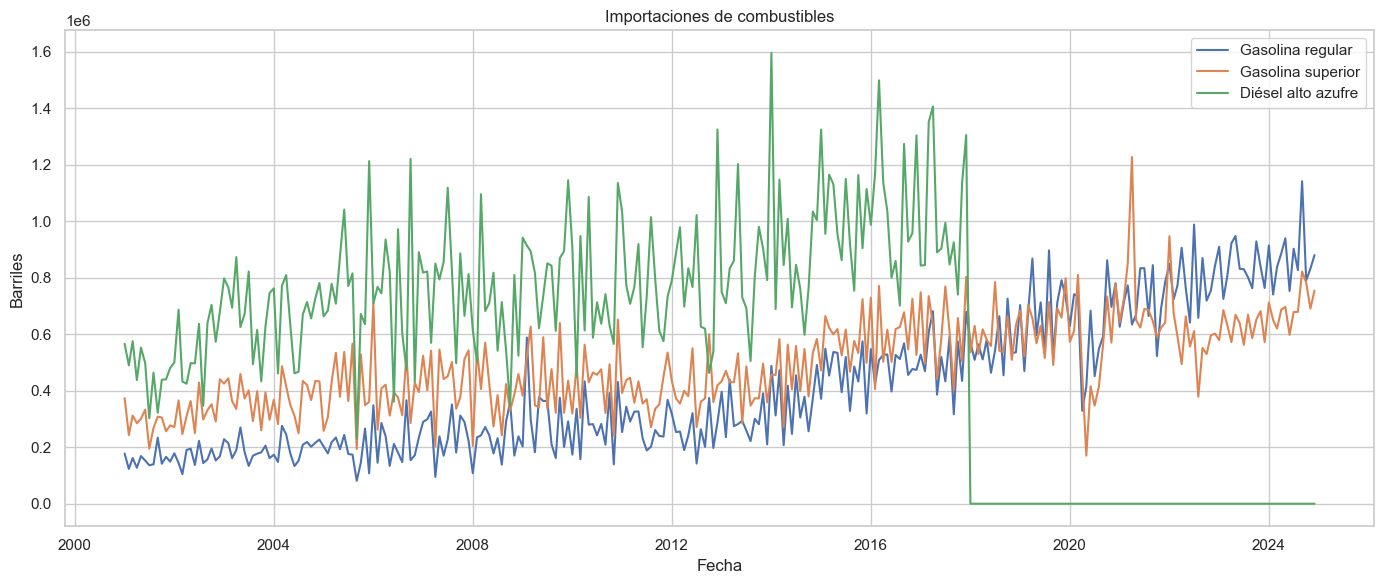

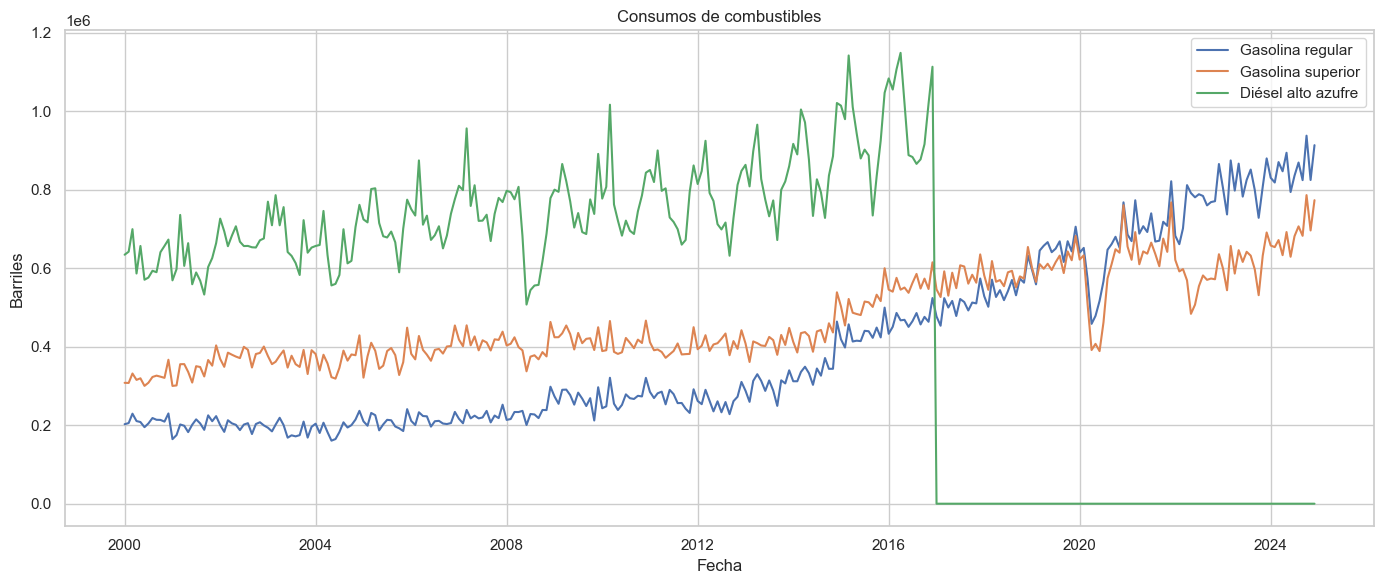

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(importacion_df["Fecha"], importacion_df["Gasolina regular"], label="Gasolina regular")
plt.plot(importacion_df["Fecha"], importacion_df["Gasolina superior"], label="Gasolina superior")
plt.plot(importacion_df["Fecha"], importacion_df["Diesel alto azufre"], label="Diésel alto azufre")
plt.title("Importaciones de combustibles")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(consumo_df["Fecha"], consumo_df["Gasolina regular"], label="Gasolina regular")
plt.plot(consumo_df["Fecha"], consumo_df["Gasolina superior"], label="Gasolina superior")
plt.plot(consumo_df["Fecha"], consumo_df["Diesel alto azufre"], label="Diésel alto azufre")
plt.title("Consumos de combustibles")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()



### Comentarios

Sin duda alguna  lo que mas llama la atencion es como al rededor del 2018... el diesel de alto azufre se fue a 0 directamente, y despues de un poco de investigación podemos concluir que este si tiene sentido y que fue por la Regulación nacional: entrada en vigor del reglamento COGUANOR, Impacto en salud pública y ambiente y basicamente que ahora casi solo se usa bajo en azufre 

### Importaciones

1. Tendencia general

Las tres series muestran una tendencia creciente a lo largo del tiempo, particularmente Gasolina regular y superior. El crecimiento es más claro después de 2015 para gasolina regular.

2. Caídas abruptas y anomalías

Se observa una caída abrupta en 2020, justo cuando inicia la pandemia. Este efecto es visible especialmente en mabas gasolinas.

3. Estacionalidad y picos

Hay picos irregulares año con año, más notorios en diésel alto azufre hasta su desaparición que pareciera como que si tiene patron entonces desde ahi podemos tal vez empezar a ubicar nuestras series. Gasolina superior también muestra picos de importación en varios años, algunos muy marcados entre 2006 y 2018. La estacionalidad no parece haber a simple vista entonces al evaluar otra serie de tiempo podriamos evaluar.


### Consumo

1. Tendencia general

Gasolina regular y superior muestran una clara tendencia creciente, especialmente gasolina regular.

Diésel alto azufre mantuvo tendencia minima tambien creciente hasta que baja a 0.

2. Picos y caídas por pandemia

Se observa una disminución marcada en todos los combustibles entre marzo y junio de 2020 por pandemia.

Gasolina regular cae notoriamente, pero se recupera rápidamente y continúa su crecimiento.

Gasolina superior cae y se estabiliza.


3. Estacionalidad

Diésel alto azufre muestra ligeros picos cíclicos, entonces podria ser por uso industrial o agrícola estacional.

Gasolina superior muestra picos más dispersos, con cierta repetición anual.


## Serie 1 -  importación de gasolina regular



In [ ]:
import_gasolina_regular = importacion_df.set_index("Fecha")["Gasolina regular"]

print("Serie: Importación de gasolina regular")
print(f"- Inicio     : {import_gasolina_regular.index.min().date()}")
print(f"- Fin        : {import_gasolina_regular.index.max().date()}")
print(f"- Total de observaciones: {len(import_gasolina_regular)}")


Serie: Importación de gasolina regular
- Inicio     : 2001-01-01
- Fin        : 2024-12-01
- Frecuencia : MS
- Total de observaciones: 288


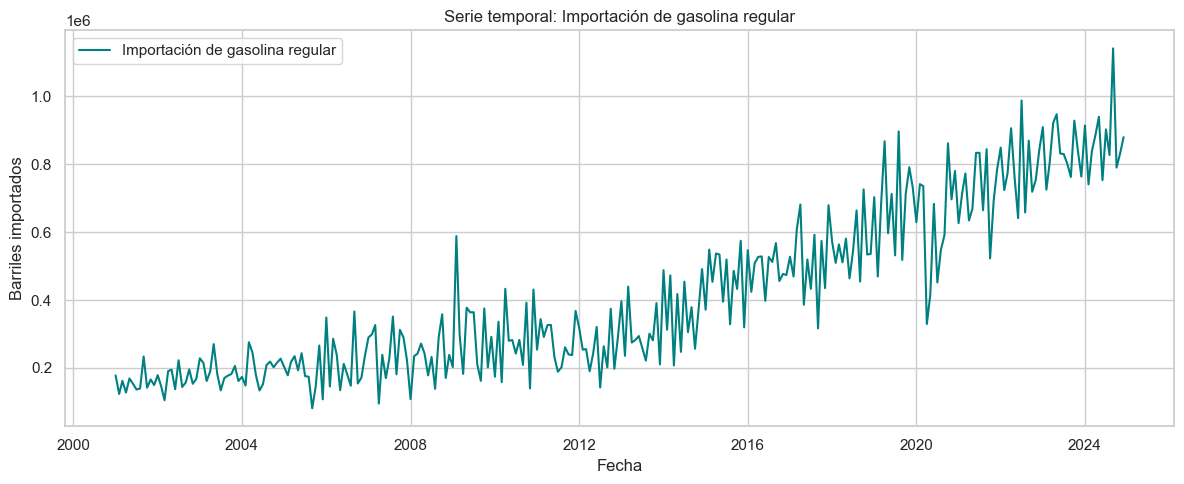

In [13]:

plt.figure(figsize=(12, 5))
plt.plot(import_gasolina_regular, label="Importación de gasolina regular", color="teal")
plt.title("Serie temporal: Importación de gasolina regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Explicación 

Tendencia creciente.

Una caída clara en 2020, por la pandemia.

Recuperación y crecimiento en los últimos años.

Variabilidad estacional moderada, pero no muy regular a simple vista.